In [1]:
"""
Name: fd_Parameter_Testing.ipynb
Authors: Stephan Meighen-Berger, Martina Karl
Example for the MC method runs
"""

'\nName: fd_Parameter_Testing.ipynb\nAuthors: Stephan Meighen-Berger, Martina Karl\nExample for the MC method runs\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Adding path to module
sys.path.append("../core/")

In [5]:
# Module imports
from fourth_day import FD
from fd_config import config

In [6]:
# Creating a fourth_day object
fd = FD(org_filter='generous', monte_carlo=True)

In [7]:
# Plotting standards
std_size = 6.
fontsize = 20.
lw=3.
h_length=1.5

In [8]:
# Parameters:
seconds = 100
population = 1000
distance = 0.

In [9]:
# Regen testing
regen_list = np.logspace(-4., 0., 4)
results = []
for regen in regen_list:
    # Launching solver
    results_tmp, _, _ = (
        fd.solve(population, 5., [distance], 1., seconds=seconds, border=2e1, regen=regen)
    )
    results.append(results_tmp[0])

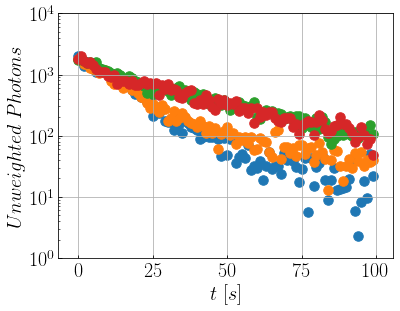

In [10]:
# Energy distributions
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
for i, regen in enumerate(regen_list):
    ax.scatter(range(seconds), results[i], s=lw*30)
# ax.set_xlim(1e0, 1e3)
ax.set_ylim(1e0, 1e4)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
plt.grid(True)
plt.show()

In [11]:
figure.savefig("C:\\Users\\steph\\Desktop\\Regeneration_Dependence.png",
               bbox_inches='tight')

In [ ]:
# Velocity testing
velocities = np.logspace(-2, 2, 20)
run_count = range(0, 10)
results_vel_total = []
for run in tqdm(run_count):
    results_vel = []
    for velocity in velocities:
        # Launching solver
        results_tmp, _, _ = (
            fd.solve(population, velocity, [distance], 1., seconds=seconds, border=1e3, regen=1e-3)
        )
        results_vel.append(results_tmp[0])
    results_vel_total.append(results_vel)

In [ ]:
# Energy distributions
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
for j in run_count:
    for i, vel in enumerate(velocities):
        ax.scatter([velocities[i]], [np.mean(results_vel_total[j][i])], s=lw*30)
# ax.set_xlim(1e0, 1e3)
ax.set_ylim(1e-3, 1e2)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r'$v\;[m/s]$', fontsize=fontsize)
ax.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
plt.grid(True)
plt.show()

In [ ]:
# figure.savefig("C:\\Users\\steph\\Desktop\\Velocity_Dependence.png",
#                bbox_inches='tight')